In [ ]:
#1.1. Global methane levels from 2002
#1.1.Compute methane climatology for each month, and plot your results in 12 panels.

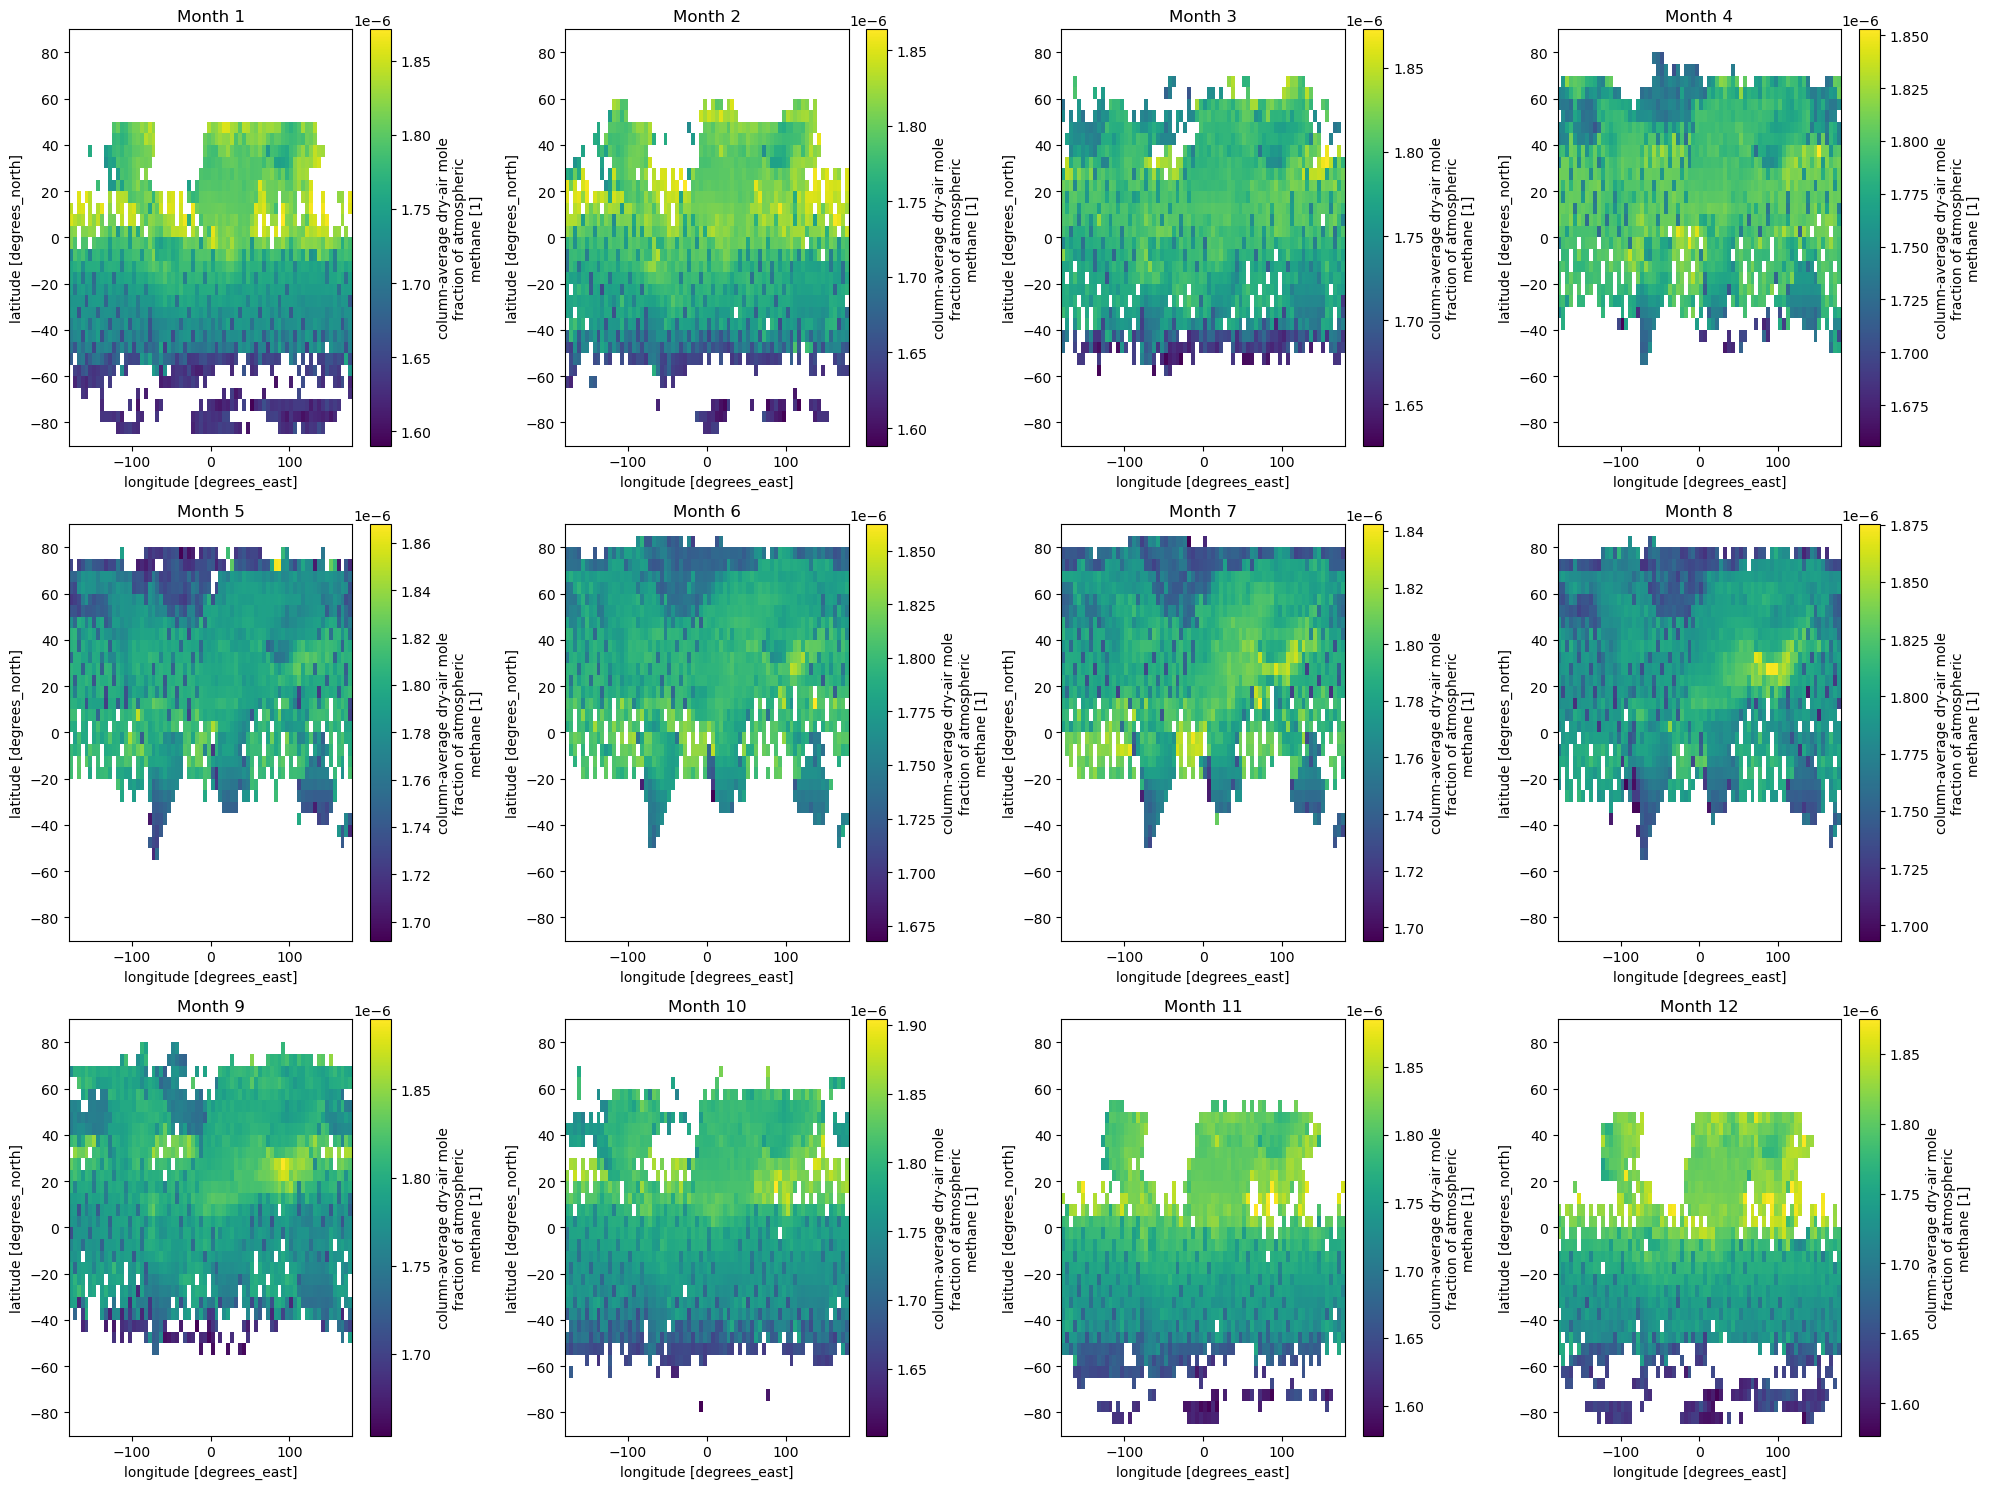

In [5]:
#使用xarray读取netCDF4文件。
#计算每个月的甲烷平均值。
#使用matplotlib绘制12个图，每个图代表一个月的甲烷。
import xarray as xr
import matplotlib.pyplot as plt
# 读取数据
ds = xr.open_dataset('D:/GitKraken/ese5023/assignment/assignment3/200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc', engine="netcdf4")
ds
# Compute methane climatology for each month
ch4_climatology = ds['xch4'].groupby('time.month').mean('time')

# 绘制12 panels
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
for i, ax in enumerate(axes.flat):
    ch4_climatology.isel(month=i).plot(ax=ax)
    ax.set_title(f'Month {i+1}')
plt.tight_layout()
plt.show()

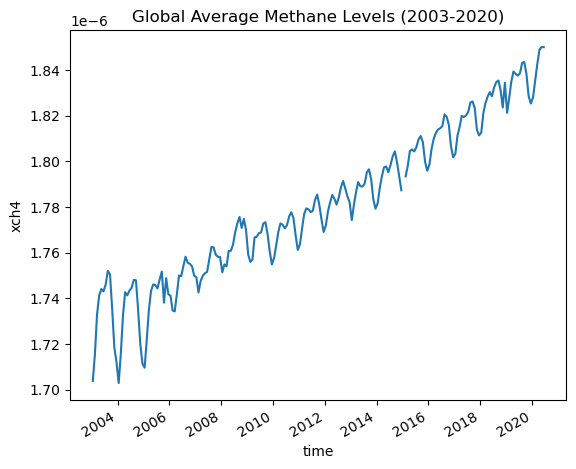

In [3]:
#1.2  Plot globally-averaged methane from 2003-01 to 2020-06 as a time series. Describe your results. Check your plot with this one.
# 计算全球平均甲烷
global_ch4 = ds['xch4'].mean(['lon', 'lat'])

# 绘制时间序列
global_ch4.plot()
plt.title('Global Average Methane Levels (2003-2020)')
plt.show()
#全球大气甲烷平均值逐年增加，年内月平均值呈锯齿状/波浪状先升高再下降。

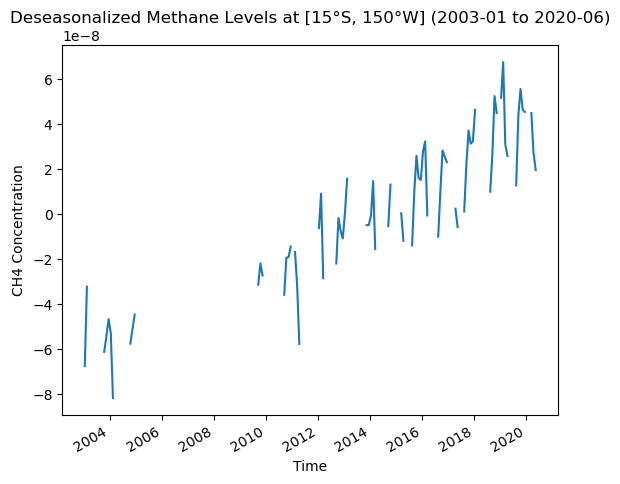

In [7]:
#1.3 Plot deseasonalized methane levels at point [15°S, 150°W] from 2003-01 to 2020-06 as a time series. Describe your results.
#计算点[15°S, 150°W]的甲烷水平。
#去除季节性周期。
#绘制时间序列图。
# 使用sel方法和method='nearest'来选择最接近的数据
point_ch4 = ds['xch4'].sel(lat=-15, lon=150, method='nearest')
point_ch4
# 检查是否有非nan的数据
if point_ch4.notnull().any():
    # 去除季节性周期
    deseasonalized_ch4 = point_ch4.groupby('time.month') - point_ch4.groupby('time.month').mean(dim='time')
    
    # 绘制时间序列图
    deseasonalized_ch4.plot()
    plt.title('Deseasonalized Methane Levels at [15°S, 150°W] (2003-01 to 2020-06)')
    plt.xlabel('Time')
    plt.ylabel('CH4 Concentration')
    plt.show()
else:
    print("No valid data to plot.")

In [9]:
#2 Niño 3.4 index
#2.1 Compute monthly climatology for SST from Niño 3.4 region, and subtract climatology from SST time series to obtain anomalies.
#读取SST数据。
#计算尼诺3.4区域的SST monthly climatology。
#从SST时间序列中减去气climatology以获得异常值。

# 读取SST数据
sst_ds = xr.open_dataset('D:/GitKraken/ese5023/assignment/assignment3/NOAA_NCDC_ERSST_v3b_SST.nc', engine="netcdf4")
sst_ds
# 定义尼诺3.4区域
nino34 = sst_ds.sst.sel(lat=slice(-5, 5), lon=slice(170, 120))
nino34
# 计算monthly climatology
sst_climatology = nino34.groupby('time.month').mean('time')
sst_climatology
# 获取异常值
sst_anomalies = nino34.groupby('time.month') - sst_climatology
sst_anomalies

<xarray.DataArray 'sst' (time: 684, lat: 5, lon: 0)>
array([], shape=(684, 5, 0), dtype=float32)
Coordinates:
  * lat      (lat) float32 -4.0 -2.0 0.0 2.0 4.0
  * lon      (lon) float32 
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [21]:
#2.1Visualize the computed Niño 3.4. Your plot should look similar to this one.
# 读取SST数据
sst_ds = xr.open_dataset('D:/GitKraken/ese5023/assignment/assignment3/NOAA_NCDC_ERSST_v3b_SST.nc', engine="netcdf4")
sst_ds
# 定义尼诺3.4区域
nino34 = sst_ds.sst.sel(lat=slice(-5, 5), lon=slice(190, 240))
nino34
# 计算monthly climatology
sst_climatology = nino34.groupby('time.month').mean('time')
sst_climatology
# 获取异常值
sst_anomalies = nino34.groupby('time.month') - sst_climatology
sst_anomalies

<xarray.DataArray 'sst' (time: 684, lat: 5, lon: 26)>
array([[[-0.43157768, -0.41846275, -0.39795303, ..., -0.2116642 ,
         -0.23776245, -0.24401474],
        [-0.41259003, -0.4067192 , -0.3875141 , ..., -0.52064896,
         -0.5346451 , -0.51997185],
        [-0.40932274, -0.39743805, -0.36237717, ..., -0.6373882 ,
         -0.6171951 , -0.583725  ],
        [-0.4140854 , -0.37909317, -0.3215618 , ..., -0.43292618,
         -0.38404274, -0.3352623 ],
        [-0.5043678 , -0.43894005, -0.3710251 , ..., -0.17453575,
         -0.11044502, -0.06918144]],

       [[-0.5374584 , -0.52739716, -0.50823593, ..., -0.40254593,
         -0.44382668, -0.45287704],
        [-0.55093956, -0.539135  , -0.51673317, ..., -0.6660595 ,
         -0.7127285 , -0.710968  ],
        [-0.61242104, -0.5959244 , -0.5572338 , ..., -0.7235069 ,
         -0.7326374 , -0.73106194],
        [-0.6798363 , -0.6483364 , -0.5889931 , ..., -0.5397434 ,
         -0.50793266, -0.49977684],
        [-0.7830448 , -0.7286701 , -0.6683655 , ..., -0.33967972,
...
         -0.2555828 , -0.13972664],
        [-0.989378  , -1.0497723 , -1.0954857 , ..., -0.86087227,
         -0.7690697 , -0.65498734],
        [-1.1887245 , -1.252285  , -1.3029232 , ..., -1.0460625 ,
         -0.9661274 , -0.8785801 ],
        [-1.002367  , -1.0756893 , -1.1325111 , ..., -0.7207298 ,
         -0.6597252 , -0.5900669 ],
        [-0.5770798 , -0.65514374, -0.72174263, ..., -0.4353485 ,
         -0.36265945, -0.28103828]],

       [[-0.3578701 , -0.41542053, -0.47110367, ..., -0.2400589 ,
         -0.1464405 , -0.03788376],
        [-0.7678585 , -0.83501625, -0.9024124 , ..., -0.727829  ,
         -0.61603355, -0.48027992],
        [-0.96187973, -1.0445309 , -1.1224213 , ..., -0.9327831 ,
         -0.81235695, -0.6655674 ],
        [-0.82112694, -0.9206734 , -1.0085506 , ..., -0.6531601 ,
         -0.5626869 , -0.4374504 ],
        [-0.4864292 , -0.5823746 , -0.6702862 , ..., -0.36221695,
         -0.30041504, -0.1987915 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -4.0 -2.0 0.0 2.0 4.0
  * lon      (lon) float32 190.0 192.0 194.0 196.0 ... 234.0 236.0 238.0 240.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

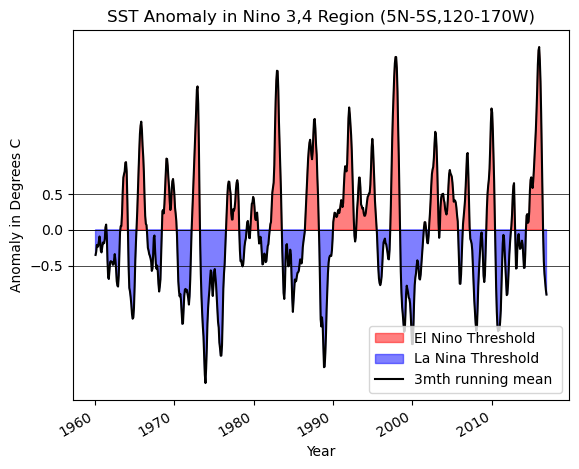

In [23]:
#2.2 Visualize the computed Niño 3.4. Your plot should look similar to this one.
sst_anomalies = nino34.groupby('time.month') - sst_climatology
#计算3月滑动平均值
rolling_mean = sst_anomalies.rolling(time=3, center=True).mean()

#计算全区的滑动平均值的平均值
rolling_mean_values = rolling_mean.mean(dim=['lat', 'lon'])

fig, ax = plt.subplots()

#填充曲线到x轴之间区域
ax.fill_between(rolling_mean.time.values, rolling_mean_values, where=rolling_mean_values >= 0,
                color='red', interpolate=True, alpha=0.5,label='El Nino Threshold')
ax.fill_between(rolling_mean.time.values, rolling_mean_values, where=rolling_mean_values < 0,
                color='blue', interpolate=True, alpha=0.5, label='La Nina Threshold')

#绘制滑动平均曲线
rolling_mean_values.plot(ax=ax,color='black', label='3mth running mean ')

ax.axhline(0, color='black',linewidth=0.5)

# 添加纵坐标网格线
ax.yaxis.grid(True)
ax.yaxis.grid(which='major', color='black', linestyle='-', linewidth=0.5)
ax.set_yticks([-0.5, 0, 0.5])

# 图例设置在右下角
ax.legend(loc='lower right')
plt.title('SST Anomaly in Nino 3,4 Region (5N-5S,120-170W)')
plt.xlabel('Year') 
plt.ylabel('Anomaly in Degrees C')

plt.show()

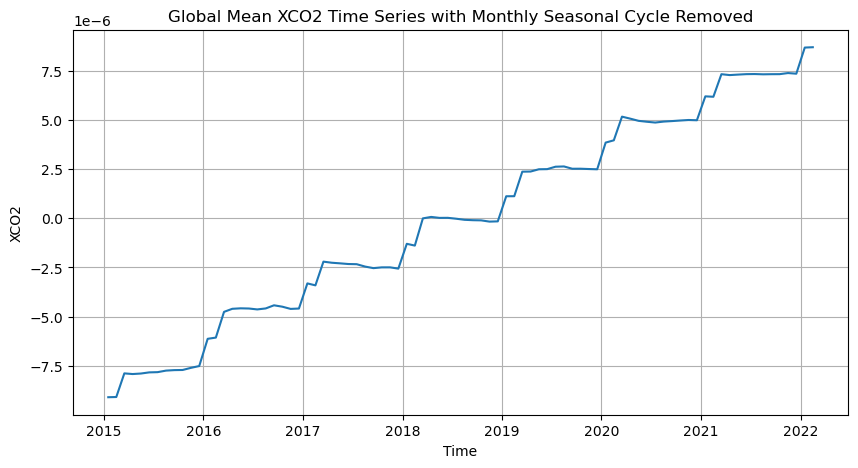

In [3]:
#3 Explore a netCDF dataset
#3.1 Plot a time series of a certain variable with monthly seasonal cycle removed.
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob

# 指定文件夹路径
folder_path = 'D:/GitKraken/ese5023/assignment/assignment3/output_file'

# 获取所有.nc4文件的路径
files = glob.glob(f'{folder_path}/*.nc4')

# 使用xarray打开所有文件
ds = xr.open_mfdataset(files, combine='nested', concat_dim='time')

# 选择变量XCO2
variable = ds['XCO2']

# 计算月季节循环（climatology）
monthly_climatology = variable.groupby('time.month').mean('time')

# 去除月季节循环
anomalies = variable.groupby('time.month') - monthly_climatology

# 计算全球平均值
global_mean_anomalies = anomalies.mean(['lat', 'lon'])

# 绘制时间序列图
plt.figure(figsize=(10, 5))
plt.plot(global_mean_anomalies.time, global_mean_anomalies.values)
plt.title('Global Mean XCO2 Time Series with Monthly Seasonal Cycle Removed')
plt.xlabel('Time')
plt.ylabel('XCO2')
plt.grid(True)
plt.show()

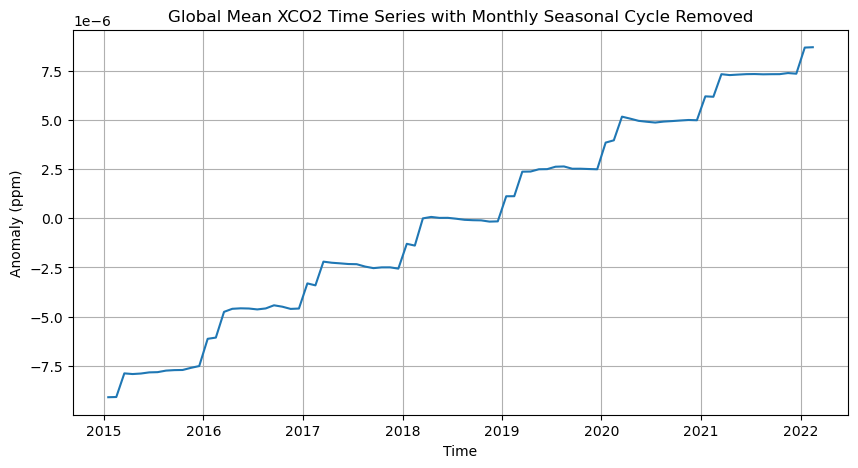

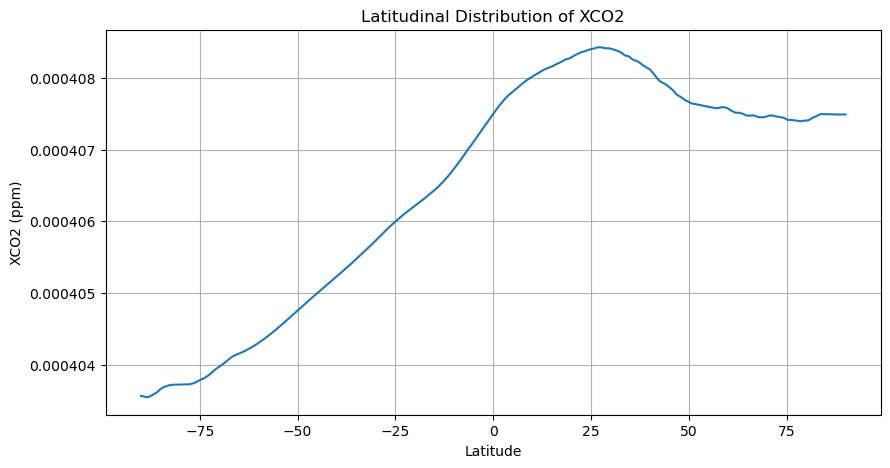

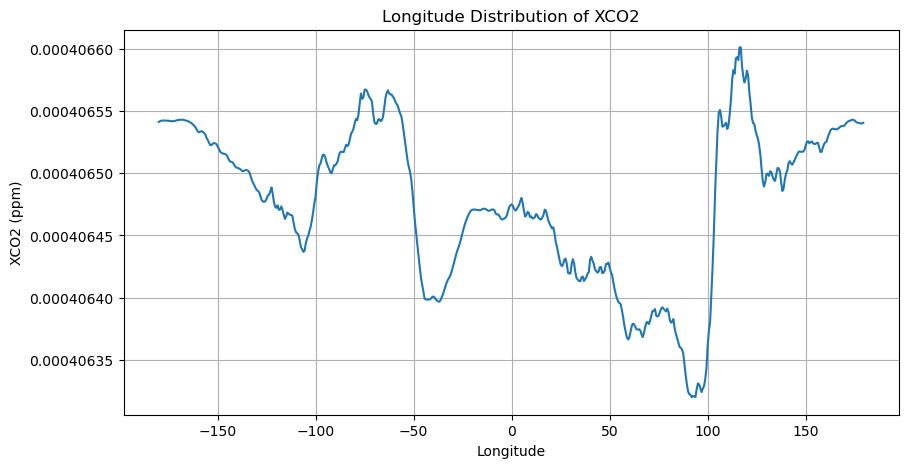

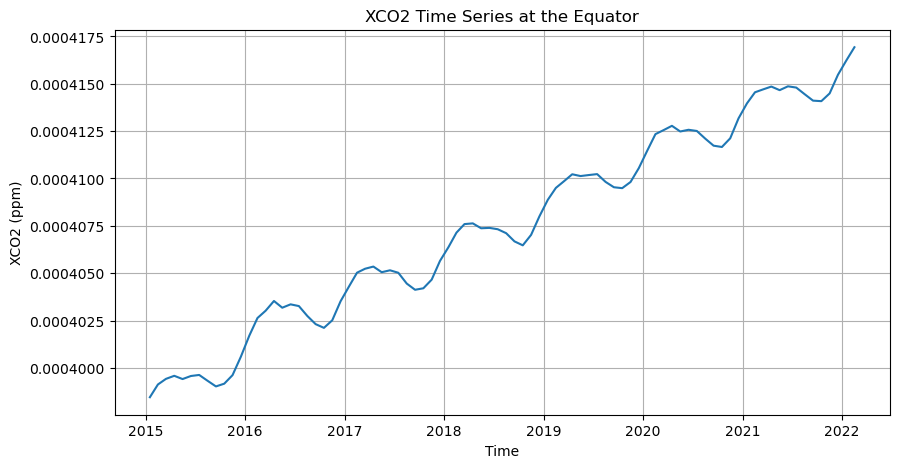

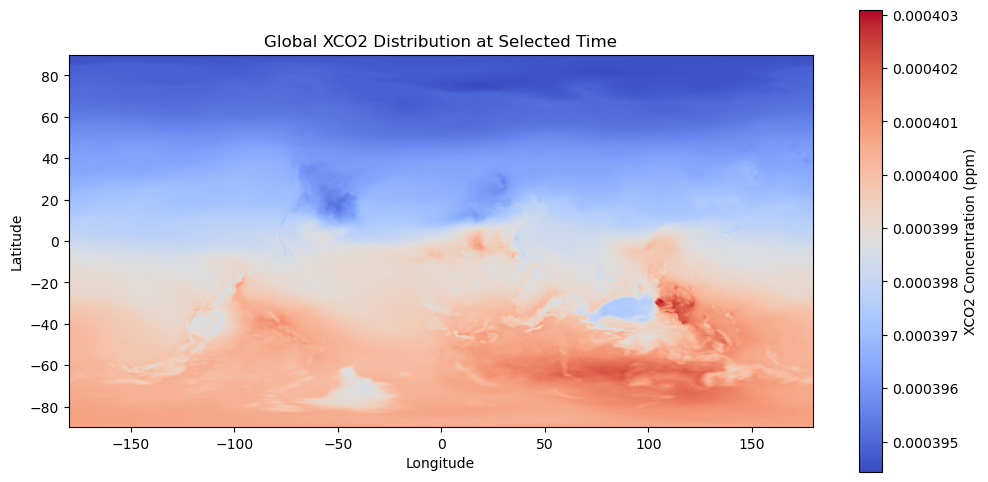

In [5]:
#3.2 Make at least 5 different plots using the dataset.
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob

# Specify the folder path
folder_path = 'D:/GitKraken/ese5023/assignment/assignment3/output_file'

# Get all .nc4 file paths
files = glob.glob(f'{folder_path}/*.nc4')

# Use xarray to open all files
ds = xr.open_mfdataset(files, combine='nested', concat_dim='time')

# Select the XCO2 variable
xco2 = ds['XCO2']

# Calculate the monthly climatology
monthly_climatology = xco2.groupby('time.month').mean('time')

# Remove the monthly seasonal cycle
anomalies = xco2.groupby('time.month') - monthly_climatology

# Plot 1: Global Mean Time Series with Monthly Seasonal Cycle Removed
plt.figure(figsize=(10, 5))
plt.plot(anomalies.mean(['lat', 'lon']).time, anomalies.mean(['lat', 'lon']).values)
plt.title('Global Mean XCO2 Time Series with Monthly Seasonal Cycle Removed')
plt.xlabel('Time')
plt.ylabel('Anomaly (ppm)')
plt.grid(True)
plt.show()

# Plot 2: Latitudinal Distribution of XCO2
plt.figure(figsize=(10, 5))
plt.plot(ds['lat'], xco2.mean(['time', 'lon']).values)
plt.title('Latitudinal Distribution of XCO2')
plt.xlabel('Latitude')
plt.ylabel('XCO2 (ppm)')
plt.grid(True)
plt.show()

# Plot 3: Longitude Distribution of XCO2
plt.figure(figsize=(10, 5))
plt.plot(ds['lon'], xco2.mean(['time', 'lat']).values)
plt.title('Longitude Distribution of XCO2')
plt.xlabel('Longitude')
plt.ylabel('XCO2 (ppm)')
plt.grid(True)
plt.show()

# Plot 4: Time Series at Specific Latitude (e.g., Equator)
equator_time_series = xco2.sel(lat=0, method='nearest').mean('lon')
plt.figure(figsize=(10, 5))
plt.plot(equator_time_series.time, equator_time_series.values)
plt.title('XCO2 Time Series at the Equator')
plt.xlabel('Time')
plt.ylabel('XCO2 (ppm)')
plt.grid(True)
plt.show()

# Plot 5: 2D plot
# Select a specific time point, e.g., the first time point
selected_time = xco2.isel(time=0)
# Create a 2D plot of global XCO2 distribution
plt.figure(figsize=(12, 6))
plt.imshow(selected_time.values, cmap='coolwarm', extent=[selected_time.lon.min(), selected_time.lon.max(), selected_time.lat.min(), selected_time.lat.max()])
plt.colorbar(label='XCO2 Concentration (ppm)')
plt.title('Global XCO2 Distribution at Selected Time')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()